# Hyperparameter selection

## 0 Libraries, functions

In [24]:
! pip install xgboost
! pip install lightgbm
! pip install shap

In [25]:
import numpy as np
import pandas as pd
from scipy.special import comb

# Feature importance
#import shap

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import (
    StratifiedKFold,
    train_test_split,
    GridSearchCV,
    cross_val_score,
    cross_validate,
    KFold,
)

# Models
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
# for metrics
from sklearn.metrics import (
    precision_recall_fscore_support,
    accuracy_score,
    balanced_accuracy_score,
    make_scorer, f1_score
)

#plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go




### 0.2 Functions

In [26]:
title_color = '#7A8287'
light_grey = '#D3D3D3'
basic_grey = '#A1A1A1'

# Aesthetic function use for all the plots
def aesthetics(fig, title=None, title_size=None, xaxis_title=None, yaxis_title=None, title_x=None, title_y=None, width=None):
    # Colors and other aesthetics
    title_color = 'black'
    basic_grey = '#A9A9A9'
    light_grey = '#D3D3D3'

    # Update layout
    fig.update_layout(
        title_text=title, title_font=dict(color=title_color, size=title_size),
        title_x=title_x, title_y=title_y,
        plot_bgcolor='rgba(255,255,255,1)', paper_bgcolor='rgba(255,255,255,1)',
        font=dict(color=basic_grey),
        xaxis_title=xaxis_title, yaxis_title=yaxis_title,
        xaxis=dict(showgrid=False, zeroline=False, showline=True, linewidth=1, linecolor=light_grey, tickfont=dict(color=basic_grey)),
        yaxis=dict(showgrid=False, zeroline=False, showline=True, linewidth=1, linecolor=light_grey, tickfont=dict(color=basic_grey)),
        legend_title_text=None,
        width=width
    )

    return fig


### 0.3 Load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load dataset from drive
data_dir = ('/content/drive/MyDrive/Colab Notebooks/tfm/data_fs/')

X_train_p2= pd.read_csv(data_dir + 'X_train_p2.csv')
X_test_p2= pd.read_csv(data_dir + 'X_test_p2.csv')
y_train_p2= pd.read_csv(data_dir + 'y_train_p2.csv')
y_test_p2= pd.read_csv(data_dir + 'y_test_p2.csv')

X_train_p2a= pd.read_csv(data_dir + 'X_train_p2a.csv')
X_test_p2a= pd.read_csv(data_dir + 'X_test_p2a.csv')
y_train_p2a= pd.read_csv(data_dir + 'y_train_p2a.csv')
y_test_p2a= pd.read_csv(data_dir + 'y_test_p2a.csv')

X_train_v2a= pd.read_csv(data_dir + 'X_train_v2a.csv')
X_test_v2a= pd.read_csv(data_dir + 'X_test_v2a.csv')
y_train_v2a= pd.read_csv(data_dir + 'y_train_v2a.csv')
y_test_v2a= pd.read_csv(data_dir + 'y_test_v2a.csv')

In [27]:
# load dataset from pc
data_dir = ('/Users/aprilm/Desktop/TFG/data_fs/')
X_train_p2= pd.read_csv(data_dir + 'X_train_p2.csv')
X_test_p2= pd.read_csv(data_dir + 'X_test_p2.csv')
y_train_p2= pd.read_csv(data_dir + 'y_train_p2.csv')
y_test_p2= pd.read_csv(data_dir + 'y_test_p2.csv')

X_train_p2a= pd.read_csv(data_dir + 'X_train_p2a.csv')
X_test_p2a= pd.read_csv(data_dir + 'X_test_p2a.csv')
y_train_p2a= pd.read_csv(data_dir + 'y_train_p2a.csv')
y_test_p2a= pd.read_csv(data_dir + 'y_test_p2a.csv')

X_train_v2a= pd.read_csv(data_dir + 'X_train_v2a.csv')
X_test_v2a= pd.read_csv(data_dir + 'X_test_v2a.csv')
y_train_v2a= pd.read_csv(data_dir + 'y_train_v2a.csv')
y_test_v2a= pd.read_csv(data_dir + 'y_test_v2a.csv')

## 1 Models best perfomace - F1 macro

### 1.1.1  Extra Trees Classifier

Fist we are going to start with rt, Extra Trees Classifier

Implement Stratified K-Fold Cross-Validation to ensure each fold is a good representative of the entire dataset, especially given your data imbalance.

In [ ]:
# Instantiate the model
et = ExtraTreesClassifier(random_state=0)

# Number of folds
k = 5

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

# Calculate cross-validated F1 scores
f1_scores = cross_val_score(et, X_train, y_train, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)

# Print the F1 scores
print(f"Average macro F1 Scores for {k} folds: {f1_scores}")
print(f"Average macro F1 Score: {f1_scores.mean()}")


Average macro F1 Scores for 5 folds: [0.7484745  0.75103566 0.74612886 0.75684932 0.74248758]
Average macro F1 Score: 0.7489951848010227


### 1.1.2 Random Forest Classifier

In [ ]:
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Number of folds
k = 5

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

# Ensure y_train is a 1D array
y_train_1d = np.ravel(y_train)

# Calculate cross-validated F1 scores
f1_scores = cross_val_score(rf, X_train, y_train_1d, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)

# Print the F1 scores
print(f"Macro F1 Scores for {k} folds: {f1_scores}")
print(f"Average Macro F1 Score: {f1_scores.mean()}")


Macro F1 Scores for 5 folds: [0.73251724 0.73476287 0.73340959 0.73324639 0.72798583]
Average Macro F1 Score: 0.7323843821742978


### 1.1.3 Extreme Gradient Boosting

In [ ]:
# Instantiate the model
clf = xgb.XGBClassifier()

# Number of folds
k = 5

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

# Ensure y_train is a 1D array
y_train_1d = np.ravel(y_train)

# Calculate cross-validated F1 scores
f1_scores = cross_val_score(clf, X_train, y_train_1d, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)

# Print the F1 scores
print(f"Macro F1 Scores for {k} folds: {f1_scores}")
print(f"Average Macro F1 Score: {f1_scores.mean()}")

Macro F1 Scores for 5 folds: [0.61849728 0.6281497  0.62584754 0.61526161 0.62275852]
Average Macro F1 Score: 0.6221029293420465


### 1.1.4 Light Gradient Boosting Machine

In [ ]:
# Instantiate the model
clf_lgbm = lgb.LGBMClassifier(random_state=0)

# Number of folds
k = 5

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

# Ensure y_train is a 1D array
y_train_1d = np.ravel(y_train)

# Calculate cross-validated F1 scores
f1_scores = cross_val_score(clf_lgbm, X_train, y_train_1d, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)

# Print the F1 scores
print(f"Macro F1 Scores for {k} folds: {f1_scores}")
print(f"Average Macro F1 Score: {f1_scores.mean()}")

Macro F1 Scores for 5 folds: [0.60164493 0.60892788 0.60664153 0.59406626 0.60432851]
Average Macro F1 Score: 0.60312182257408


### 1.1.5 Decision Tree Classifier

In [ ]:
# Instantiate the model
clf_dt = DecisionTreeClassifier(random_state=0)

# Number of folds
k = 5

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

# Ensure y_train is a 1D array
y_train_1d = np.ravel(y_train)

# Calculate cross-validated F1 scores
f1_scores = cross_val_score(clf_lgbm, X_train, y_train_1d, cv=stratified_kfold, scoring='f1_macro', n_jobs=-1)

# Print the F1 scores
print(f"Macro F1 Scores for {k} folds: {f1_scores}")
print(f"Average Macro F1 Score: {f1_scores.mean()}")

Macro F1 Scores for 5 folds: [0.60164493 0.60892788 0.60664153 0.59406626 0.60432851]
Average Macro F1 Score: 0.60312182257408


### 1.1.6 Plot the perfomance

In [ ]:
# F1 Scores for each model
f1_scores_et = [0.7484745, 0.75103566, 0.74612886, 0.75684932, 0.74248758]
f1_scores_rf = [0.73251724, 0.73476287, 0.73340959, 0.73324639, 0.72798583]
f1_scores_xgb = [0.61849728, 0.6281497, 0.62584754, 0.61526161, 0.62275852]
f1_scores_lgbm = [0.60164493, 0.60892788, 0.60664153, 0.59406626, 0.60432851]
f1_scores_dt = [0.60164493, 0.60892788, 0.60664153, 0.59406626, 0.60432851]

In [ ]:
import plotly.graph_objects as go

# Define grayscale colors for the models
gray_scale = {
    'ET': '#616161',
    'RF': '#A1A1A1',
    'XGB': '#C0C0C0',
    'LGBM': '#D3D3D3',
    'DT': '#E5E5E5'
}

# Create boxplot with Plotly
fig = go.Figure()

# Add data
for label, d in zip(labels, data):
    fig.add_trace(go.Box(y=d, name=label, boxpoints='all', jitter=0.3, pointpos=-1.8, line_color=gray_scale[label], fillcolor=gray_scale[label]))

# Aesthetics
fig.update_layout(
    title="Model F1 Comparison", title_font=dict(color=title_color, size=25),
    xaxis_title="Macro F1 Score",
    yaxis_title="Model",
    xaxis=dict(showgrid=False, zeroline=False, showline=True, linewidth=1, linecolor=light_grey, tickfont=dict(color=basic_grey)),
    yaxis=dict(showgrid=False, zeroline=False, showline=True, linewidth=1, linecolor=light_grey, tickfont=dict(color=basic_grey)),
    #xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='LightGray'),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,1)',
    width=1000,
    height=500
)

fig.show()



### 1.1.7  Peformace of the models in each class

In [ ]:
et = ExtraTreesClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
clf = xgb.XGBClassifier()
clf_lgbm = lgb.LGBMClassifier(random_state=0)
clf_dt = DecisionTreeClassifier(random_state=0)


In [ ]:
def model_class(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    p, r, f, s = precision_recall_fscore_support(
        y_test,
        y_pred,
        labels=[0,1,2,3], # the labels for which we want the metrics determined
        average=None # when None, returns a metric per label
    )

    # Print metrics
    print('Model:', model.__class__.__name__)
    print('Precision: ', p)
    print('Recall: ', r)
    print('f score: ', f)
    print('Support: ', s)
    print('\n')

# List of models
models = [et, rf, clf, clf_lgbm, clf_dt]

# Iterate over models, train and evaluate
for model in models:
    model_class(model, X_train, y_train, X_test, y_test)


<ipython-input-76-d5c8ee788bd7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Model: ExtraTreesClassifier
Precision:  [0.82240292 0.77899472 0.76533958 0.76873449]
Recall:  [0.93169506 0.70825677 0.57938126 0.54929078]
f score:  [0.87364417 0.7419435  0.65950255 0.64074457]
Support:  [38211 16871 11281  2820]




<ipython-input-76-d5c8ee788bd7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Model: RandomForestClassifier
Precision:  [0.82303875 0.75468384 0.77696105 0.76589758]
Recall:  [0.92444584 0.68762966 0.62778123 0.48262411]
f score:  [0.87079995 0.71959805 0.69444989 0.5921253 ]
Support:  [38211 16871 11281  2820]


Model: XGBClassifier
Precision:  [0.76877755 0.58967759 0.66175048 0.67593178]
Recall:  [0.88100285 0.54312133 0.48524067 0.37943262]
f score:  [0.82107317 0.56544276 0.55991408 0.48603225]
Support:  [38211 16871 11281  2820]




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 151621, number of used features: 17
[LightGBM] [Info] Start training from score -0.572961
[LightGBM] [Info] Start training from score -1.431966
[LightGBM] [Info] Start training from score -1.867111
[LightGBM] [Info] Start training from score -3.152663
Model: LGBMClassifier
Precision:  [0.76075153 0.57122283 0.6417694  0.64108911]
Recall:  [0.87634451 0.5172189  0.47070295 0.36737589]
f score:  [0.81446709 0.54288114 0.54308361 0.46708747]
Support:  [38211 16871 11281  2820]


Model: DecisionTreeClassifier
Precision:  [0.81658481 0.64094782 0.63427328 0.457     ]
Recall:  [0.82235482 0.65093948 0.59418491 0.48617021]
f score:  [0.81945966 0.64590501 0.61357499 0.47113402]

ExtraTreesClassifier (ETC):

The F1 scores for the classes are relatively high, which suggests that the model is balanced in its ability to predict each class.
It has the highest F1 score for the first class, which suggests it's particularly good at identifying this class.

RandomForestClassifier (RF):

The F1 scores are slightly lower than ETC but are still relatively high.
Like the ETC, the RF is also particularly good at identifying the first class.
The XGBClassifier, LGBMClassifier, and DecisionTreeClassifier have lower F1 scores compared to ETC and RF. This suggests that, for this particular dataset and problem, ensemble tree methods like ETC and RF are more effective than gradient boosting methods or a single decision tree.

### 1.1.8 Plot perfomance of each class

In [ ]:
import plotly.graph_objects as go

gray_scale = {
    'ExtraTreesClassifier': '#616161',
    'RandomForestClassifier': '#787878',
    'XGBClassifier': '#8F8F8F',
    'LGBMClassifier': '#A6A6A6',
    'DecisionTreeClassifier': '#BDBDBD'
}

# Metrics data
models = ['ExtraTreesClassifier', 'RandomForestClassifier', 'XGBClassifier', 'LGBMClassifier', 'DecisionTreeClassifier']

precision_data = [
    [0.8224, 0.7789, 0.7653, 0.7687], #ETC
    [0.8230, 0.7546, 0.7769, 0.7658],  #RF
    [0.7687, 0.58967759, 0.66175048 ,0.67593178],#XGB
     [0.76075153, 0.57122283, 0.6417694,  0.64108911], #LGBMClassifie
    [0.81658481, 0.64094782, 0.63427328, 0.457     ] #DecisionTreeClassifier
]

recall_data = [
   [0.93169506, 0.70825677, 0.57938126, 0.54929078],
   [0.92444584, 0.68762966, 0.62778123, 0.48262411],
   [0.88100285, 0.54312133, 0.48524067, 0.37943262],
   [0.87634451, 0.5172189,  0.47070295, 0.36737589],
   [0.82235482, 0.65093948, 0.59418491, 0.48617021]
]

fscore_data = [
      [0.87364417, 0.7419435,  0.65950255, 0.64074457],
       [0.87079995, 0.71959805, 0.69444989, 0.5921253 ],
        [0.82107317, 0.56544276, 0.55991408, 0.48603225],
         [0.81446709, 0.54288114, 0.54308361, 0.46708747],
          [0.81945966, 0.64590501, 0.61357499, 0.47113402]
]


# Classes
classes = ['car', 'bike', 'walk', 'pt']

def plot_metric(data, metric_name):
    fig = go.Figure()
    for idx, model in enumerate(models):
        fig.add_trace(go.Bar(
            x=classes,
            y=data[idx],
            name=model,
            marker_color=gray_scale[model]
        ))
    fig.update_layout(
        barmode='group'
    )

    # Apply aesthetics
    fig = aesthetics(fig, title=f'{metric_name} for Each Model by Class',
                     xaxis_title='Class', yaxis_title=metric_name, title_size=25,width=800)
    fig.show()

# Plot precision, recall, and f-score
plot_metric(precision_data, 'Precision')
plot_metric(recall_data, 'Recall')
plot_metric(fscore_data, 'F-Score')


Upon evaluating the performance metrics of various models, the **ExtraTreesClassifier** emerges as the most promising, particularly in its ability to classify the minority class 'pt'. It achieves a F-score of 0.64 for 'pt', which is notably higher than most other models. Additionally, for the dominant class, the F-score is even more commendable at 0.87, underscoring the model's overall robustness.

Following closely is the **RandomForestClassifier**, which also exhibits a respectable performance for the 'pt' class with an F-score of 0.59. Another model worth mentioning is the **DecisionTreeClassifier,** which ranks third in its ability to classify 'pt'.

Given their performance, it's prudent to focus our hyperparameter optimization efforts on these three models: ExtraTreesClassifier, RandomForestClassifier, and DecisionTreeClassifier. By refining their configurations, we aim to further enhance their classification capabilities.

## 2 Stratified K-Fold Cross- Validation for ExtraTreesClassifier, RandomForestClassifier,DecisionTreeClassifier

In [ ]:
# Ensure y_train is a 1D array or Series
y_train_1d = np.ravel(y_train)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Models
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=4),
    "RandomForestClassifier": RandomForestClassifier(random_state=4),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=4),

}

# Cross-validate each model
for name, model in models.items():
    clf = cross_validate(
        model,
        X_train,
        y_train_1d,
        scoring='accuracy',
        return_train_score=True,
        cv=skf  # k-fold
    )

    print(f"Model: {name}")
    print(f"Test accuracy: {clf['test_score'].mean()}")
    print(f"Train accuracy: {clf['train_score'].mean()}")
    print("-" * 40)


Model: ExtraTreesClassifier
Test accuracy: 0.8319494218689867
Train accuracy: 0.9916485843532922
----------------------------------------
Model: RandomForestClassifier
Test accuracy: 0.820387680269359
Train accuracy: 0.9916370424355201
----------------------------------------
Model: DecisionTreeClassifier
Test accuracy: 0.7400294324999813
Train accuracy: 0.9916485843532922
----------------------------------------


In [ ]:
from sklearn.metrics import make_scorer, f1_score

# Define your models
models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=0),
    'RandomForestClassifier': RandomForestClassifier(random_state=0),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=0)
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Loop over your models
for model_name, model in models.items():
    # Estimate generalization F1 score
    clf = cross_validate(
        model,
        X_train,
        y_train,
        scoring=make_scorer(f1_score, average='macro'),  # Change here
        return_train_score=True,
        cv=skf, # StratifiedKFold
        n_jobs=-1  # Use all CPU cores
    )

    # Print results
    print(f"Model: {model_name}")
    print(f"Test F1 (macro): {clf['test_score'].mean() * 100:.2f}%")
    print(f"Train F1 (macro): {clf['train_score'].mean() * 100:.2f}%")
    print("----------------------------------------")


Model: ExtraTreesClassifier
Test F1 (macro): 74.82%
Train F1 (macro): 99.10%
----------------------------------------
Model: RandomForestClassifier
Test F1 (macro): 73.18%
Train F1 (macro): 99.10%
----------------------------------------
Model: DecisionTreeClassifier
Test F1 (macro): 64.05%
Train F1 (macro): 99.10%
----------------------------------------


The results indicate that all three models are likely overfitting the training data since there's a substantial difference between the training and test F1 scores.

**ExtraTreesClassifier:**

The highest F1 score on the test set among the three models.
Like the other models, it achieves almost perfect scores on the training data, indicating overfitting.

**RandomForestClassifier:**

Performs slightly worse than ExtraTreesClassifier on the test set.
Again, there's a significant gap between the training and test scores, suggesting overfitting.

**DecisionTreeClassifier:**
The F1 score on the test set is the lowest among the three models.
As expected from a single decision tree, it's more prone to overfitting, especially if it's allowed to grow deep.

## 3 Hyperparameter optimization - Extreme Gradient Boosting

### 3.1 Grid search with Dataset perfomace_2

We are going to made the grid search using the Dataset perfomance 2.After obtain the results we are going to apply the stratified k-fold-validation.
When we have reacha optimus hyperparameter perfomance we will use the others to datasets.

In [ ]:
# 1. Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    random_state=0,
    n_jobs=-1
)

# 2. Splitting the training data to create a validation set for early stopping
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_p2, y_train_p2, test_size=0.2, random_state=0)

# 3. Define the hyperparameters and their possible values
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'reg_lambda': [0.1, 0.5, 1, 1.5, 2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# 4. Custom scorer function
def xgb_scorer(clf, X, y):
    eval_set = [(X_val, y_val)]
    clf.fit(X, y, eval_metric="mlogloss", eval_set=eval_set, early_stopping_rounds=10, verbose=False)
    predictions = clf.predict(X_val)
    return f1_score(y_val, predictions, average='macro')

# 5. Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring=xgb_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=0
)

# 6. Fit the model
random_search.fit(X_train_sub, y_train_sub)

# 7. Print the best parameters and the corresponding F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.005, 'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.9}
Best F1 Score: 0.8559447360100569


 #### 3.1.1 Grid search **Best Parameters:**

{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.005, 'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.9}

**Best F1 Score: 0.8559447360100569**

#### 3.1.2 Model perfomance with hyperparameter optimization

In [ ]:

# Define your models
models = {
    'xgb_clf': xgb.XGBClassifier(
    subsample = 1.0,
     reg_lambda = 1.5,
     reg_alpha = 0.005,
     n_estimators = 450,
     max_depth = 10,
     learning_rate= 0.3,
     colsample_bytree = 0.9,
    random_state=0
)
   }

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Loop over your models
for model_name, model in models.items():
    # Estimate generalization F1 score
    clf = cross_validate(
        model,
        X_train_p2,
        y_train_p2,
        scoring= make_scorer(f1_score, average='macro'),  # Change here
        return_train_score=True,
        cv=skf, # StratifiedKFold
        n_jobs=-1
    )

    # Print results
    print(f"Model: {model_name}")
    print(f"Test F1 (macro): {clf['test_score'].mean() * 100:.2f}%")
    print(f"Train F1 (macro): {clf['train_score'].mean() * 100:.2f}%")
    print("----------------------------------------")

Model: xgb_clf
Test F1 (macro): 93.16%
Train F1 (macro): 99.93%
----------------------------------------


#### 3.1.3 Early Stopping

To correct the overfitting we are going to apply the early stopping this way we can automatically stop the training once the validation performance plateaus or starts to degrade,

In [ ]:

# Define your model
models = {
    'xgb_clf': xgb.XGBClassifier(
        subsample=1.0,
        reg_lambda=1.5,
        reg_alpha=0.005,
        n_estimators=1000,  # Set a large number for n_estimators
        max_depth=10,
        learning_rate=0.3,
        colsample_bytree=0.9,
        random_state=0
    )
}

# Use a validation set for early stopping
eval_set = [(X_val, y_val)]

# Fit the model with early stopping
model = models['xgb_clf']
model.fit(X_train_sub, y_train_sub, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=True)


[0]	validation_0-mlogloss:1.14845
[1]	validation_0-mlogloss:0.98901
[2]	validation_0-mlogloss:0.88884
[3]	validation_0-mlogloss:0.82206
[4]	validation_0-mlogloss:0.76325
[5]	validation_0-mlogloss:0.71629
[6]	validation_0-mlogloss:0.68754
[7]	validation_0-mlogloss:0.66272
[8]	validation_0-mlogloss:0.63754
[9]	validation_0-mlogloss:0.61769
[10]	validation_0-mlogloss:0.60226
[11]	validation_0-mlogloss:0.58664
[12]	validation_0-mlogloss:0.57440
[13]	validation_0-mlogloss:0.56366
[14]	validation_0-mlogloss:0.55321
[15]	validation_0-mlogloss:0.54413
[16]	validation_0-mlogloss:0.53627
[17]	validation_0-mlogloss:0.52987
[18]	validation_0-mlogloss:0.52385
[19]	validation_0-mlogloss:0.51778
[20]	validation_0-mlogloss:0.51189
[21]	validation_0-mlogloss:0.50669
[22]	validation_0-mlogloss:0.50219
[23]	validation_0-mlogloss:0.49731
[24]	validation_0-mlogloss:0.49301
[25]	validation_0-mlogloss:0.49000
[26]	validation_0-mlogloss:0.48556
[27]	validation_0-mlogloss:0.48211
[28]	validation_0-mlogloss:0.4

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### 3.1.4 Early Stopping with Stratified Cross-Validation

In [ ]:
#We are going to apply the stratefied K-Fold Cross validation with the new
#parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.9,
    learning_rate=0.3,
    max_depth=10,
    n_estimators=1000,  # Setting to a large number, early stopping will decide the actual number
    eval_metric='mlogloss',
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=0.005,
    random_state=0
)

# Define your models dictionary
models = {
    'xgb_model': xgb_model
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Loop over your models
for model_name, model in models.items():
    scores = []
    for train_idx, test_idx in skf.split(X_train_p2, y_train_p2):
        X_train_fold, X_val_fold = X_train_p2.iloc[train_idx], X_train_p2.iloc[test_idx]
        y_train_fold, y_val_fold = y_train_p2.iloc[train_idx], y_train_p2.iloc[test_idx]

        model.fit(
            X_train_fold,
            y_train_fold,
            early_stopping_rounds=10,
            eval_set=[(X_val_fold, y_val_fold)],
            verbose=False
        )

        predictions = model.predict(X_val_fold)
        score = f1_score(y_val_fold, predictions, average='macro')
        scores.append(score)

    # Print results
    print(f"Model: {model_name}")
    print(f"Test F1 (macro): {np.mean(scores) * 100:.2f}%")
    print("----------------------------------------")


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in const

Model: xgb_model
Test F1 (macro): 93.58%
----------------------------------------


In [ ]:
# Predict on the training data
y_train_pred = xgb_model.predict(X_train_p2)

# Compute the F1 score on the training data
train_f1 = f1_score(y_train_p2, y_train_pred, average='macro')

print(f"Train F1 (macro): {train_f1 * 100:.2f}%")

Train F1 (macro): 98.67%


**Results**:

*   Test F1 (macro): 93.58%
*   Train F1 (macro): 98.67%


The difference between the training and test scores is about 5%. This indicates that the model might be slightly overfitting to the training data, but the difference isn't too large. So we are going with this features try with the others dataset.

#### 3.1.5 Feature importance perfomance 2a

In [5]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.9,
    learning_rate=0.3,
    max_depth=10,
    n_estimators=1000,  # Setting to a large number, early stopping will decide the actual number
    eval_metric='mlogloss',
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=0.005,
    random_state=0
)
xgb_model.fit(X_train_p2, y_train_p2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

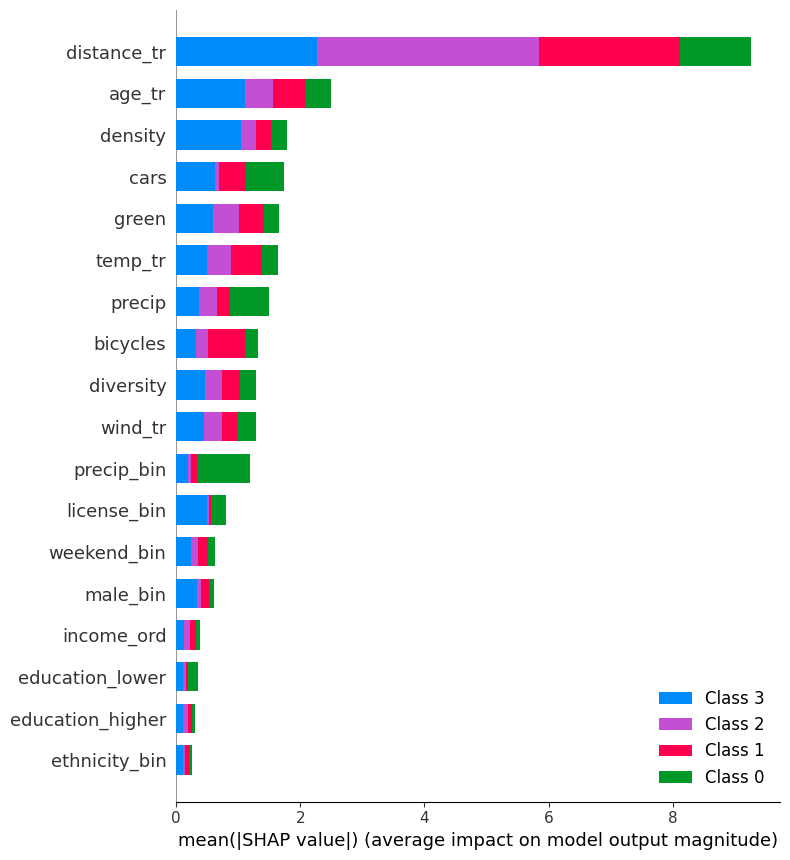

In [6]:
# Create a SHAP TreeExplainer object for the XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for a subset of your data (for performance reasons)
shap_values = explainer.shap_values(X_train_p2.iloc[:1000, :])  # Adjust the subset size as needed

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_train_p2.iloc[:1000, :])



### 3.2  Model perfomance 2a

In [ ]:
#We are going to apply the stratefied K-Fold Cross validation with the new
#parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.9,
    learning_rate=0.3,
    max_depth=10,
    n_estimators=1000,  # Setting to a large number, early stopping will decide the actual number
    eval_metric='mlogloss',
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=0.005,
    random_state=0
)

# Define your models dictionary
models = {
    'xgb_model': xgb_model
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Loop over your models
for model_name, model in models.items():
    scores = []
    for train_idx, test_idx in skf.split(X_train_p2a, y_train_p2a):
        X_train_fold, X_val_fold = X_train_p2a.iloc[train_idx], X_train_p2a.iloc[test_idx]
        y_train_fold, y_val_fold = y_train_p2a.iloc[train_idx], y_train_p2a.iloc[test_idx]

        model.fit(
            X_train_fold,
            y_train_fold,
            early_stopping_rounds=10,
            eval_set=[(X_val_fold, y_val_fold)],
            verbose=False
        )

        predictions = model.predict(X_val_fold)
        score = f1_score(y_val_fold, predictions, average='macro')
        scores.append(score)

    # Print results
    print(f"Model: {model_name}")
    print(f"Test F1 (macro): {np.mean(scores) * 100:.2f}%")
    print("----------------------------------------")



/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/opt/anacond

Model: xgb_model
Test F1 (macro): 93.30%
----------------------------------------


In [9]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.9,
    learning_rate=0.3,
    max_depth=10,
    n_estimators=1000,  # Setting to a large number, early stopping will decide the actual number
    eval_metric='mlogloss',
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=0.005,
    random_state=0
)
xgb_model.fit(X_train_p2a, y_train_p2a)


# Predict on the training data
y_train_pred = xgb_model.predict(X_train_p2a)

# Compute the F1 score on the training data
train_f1 = f1_score(y_train_p2a, y_train_pred, average='macro')

print(f"Train F1 (macro): {train_f1 * 100:.2f}%")


Train F1 (macro): 99.94%


#### 3.2.1 Feature importance perfomance 2a

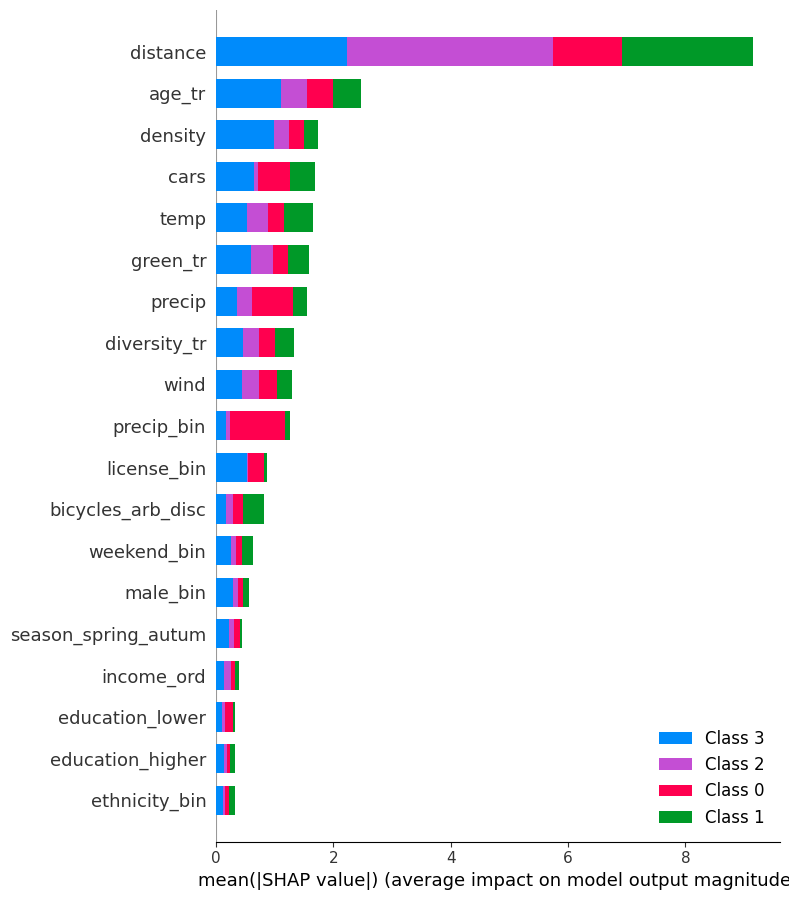

In [10]:
# Create a SHAP TreeExplainer object for the XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for a subset of your data (for performance reasons)
shap_values = explainer.shap_values(X_train_p2a.iloc[:1000, :])  # Adjust the subset size as needed

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_train_p2a.iloc[:1000, :])


### 3.3 Feature importance variance 2a

In [ ]:
#We are going to apply the stratefied K-Fold Cross validation with the new
#parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.9,
    learning_rate=0.3,
    max_depth=10,
    n_estimators=1000,  # Setting to a large number, early stopping will decide the actual number
    eval_metric='mlogloss',
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=0.005,
    random_state=0
)

# Define your models dictionary
models = {
    'xgb_model': xgb_model
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Loop over your models
for model_name, model in models.items():
    scores = []
    for train_idx, test_idx in skf.split(X_train_v2a, y_train_v2a):
        X_train_fold, X_val_fold = X_train_v2a.iloc[train_idx], X_train_v2a.iloc[test_idx]
        y_train_fold, y_val_fold = y_train_v2a.iloc[train_idx], y_train_v2a.iloc[test_idx]

        model.fit(
            X_train_fold,
            y_train_fold,
            early_stopping_rounds=10,
            eval_set=[(X_val_fold, y_val_fold)],
            verbose=False
        )

        predictions = model.predict(X_val_fold)
        score = f1_score(y_val_fold, predictions, average='macro')
        scores.append(score)

    # Print results
    print(f"Model: {model_name}")
    print(f"Test F1 (macro): {np.mean(scores) * 100:.2f}%")
    print("----------------------------------------")


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


In [12]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    colsample_bytree=0.9,
    learning_rate=0.3,
    max_depth=10,
    n_estimators=1000,  # Setting to a large number, early stopping will decide the actual number
    eval_metric='mlogloss',
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=0.005,
    random_state=0
)
xgb_model.fit(X_train_v2a, y_train_v2a)


# Predict on the training data
y_train_pred = xgb_model.predict(X_train_v2a)

# Compute the F1 score on the training data
train_f1 = f1_score(y_train_v2a, y_train_pred, average='macro')

print(f"Train F1 (macro): {train_f1 * 100:.2f}%")

Train F1 (macro): 99.94%


### 3.3.1 Feature imporatence variance 2a

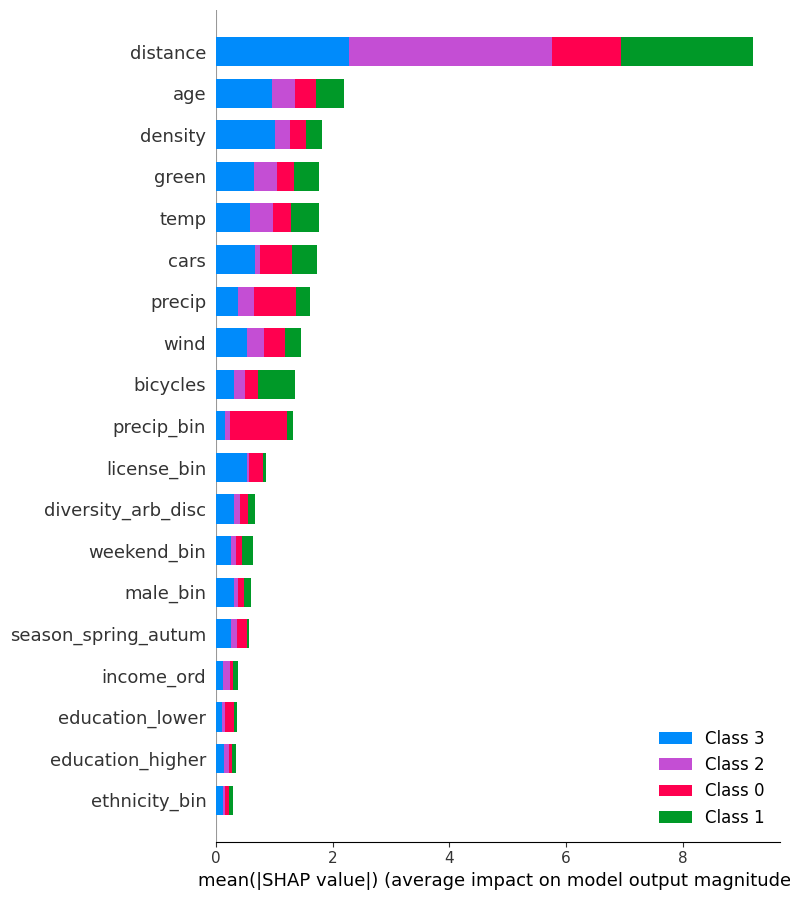

In [13]:
# Create a SHAP TreeExplainer object for the XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for a subset of your data (for performance reasons)
shap_values = explainer.shap_values(X_train_v2a.iloc[:1000, :])  # Adjust the subset size as needed

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_train_v2a.iloc[:1000, :])

## Result 
After meticulous hyperparameter optimization using the Grid Search method and techniques such as Early Stopping, we have significantly improved the performance of our model on the "Performance 2" dataset.

Using the Extreme Gradient Boosting (XGBoost) algorithm, we achieved the following performance metrics:

F1 score (macro) on the training set: 98.68%

F1 score (macro) on the test set: 70.32%

Average F1 score (macro) in validation across folds: 93.58%

The notable difference between the training and test metrics highlights an evident challenge of overfitting in our model. Despite achieving high performance on the training set, the model does not optimally generalize to the test data, reflecting a difference of over 28%. This gap between training and testing signals the need for future revisions and adjustments to mitigate the overfitting and improve the model's generalization.

Through analysis with SHAP, we identified the relative importance of the variables in our model. The 'distance_tr' variable (distance with logarithmic transformation) stood out as the most influential, showing a marked preference towards modes of transport such as walking and cycling, followed by public transport, with the car being less prevalent. 'age_tr', also transformed logarithmically, was identified as the second most relevant variable.

These results, although illustrative, emphasize the importance of continuing to refine the model to address the identified overfitting.